In [1]:
import pandas as pd
import numpy as np
from xgboost.sklearn import XGBRegressor #XGB
global model_test
model_test = XGBRegressor()
model_test.load_model(fname='./model_save/xgboost_regression_model.model')

In [ ]:
'''
max QY
QY= model.predict(x)
M1,M2,C,V,T,H=x 6个实验参数
s.t.
 0<M1+M2<=3
 0<=M1,M2<=3
 C<=10
 V<=25*0.8=20
 T<=200
 H<=12
'''
'''
def obj_func(x):
    x_size=x.reshape(1,6)
    return - model_test.predict(x_size)
'''
def obj_func(x):
    return -model_test.predict(x.reshape(1,6))[0]

constraint_ueq =[
    lambda x: 0 - x[0] * x[1],
    lambda x: x[0] + x[1] - 3
]
# %% Do DifferentialEvolution差分进化算法
from sko.DE import DE
#https://scikit-opt.github.io/scikit-opt/#/zh/README SKO的中文文档
de = DE(func=obj_func, n_dim=6, size_pop=50, max_iter=800, lb=[0,0,0,0,100,2],ub=[3,3,10,20,200,12], constraint_ueq=constraint_ueq)
best_x, best_y = de.run()
print('best_x:', best_x, '\n', 'best_y:', best_y)

In [11]:
#保存结果
print(type(de.generation_best_Y))

<class 'list'>


In [3]:
# 遗传算法
from sko.GA import GA 

ga = GA(func=obj_func, n_dim=6, size_pop=50, max_iter=800, lb = [0,0,0,0,100,2],
        ub=[3,3,10,20,200,12], constraint_ueq=constraint_ueq, precision= [1e-7,1e-7, 1, 1, 10, 1])
best_x, best_y = ga.run()
print('best_x:', best_x, '\n', 'best_y:', best_y)

best_x: [  1.15650169   0.8796767   10.          16.         100.
  10.        ] 
 best_y: [-23.008205]


In [15]:
#保存结果
type(ga.generation_best_Y) #每一代的最优函数值
#ga.all_history_Y

list

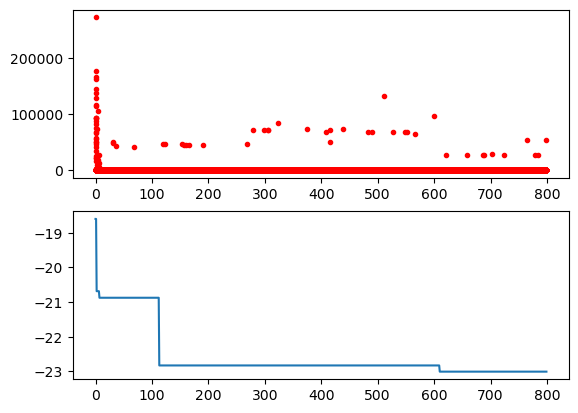

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

Y_history = pd.DataFrame(ga.all_history_Y)
fig, ax = plt.subplots(2, 1)
ax[0].plot(Y_history.index, Y_history.values, '.', color='red')
Y_history.min(axis=1).cummin().plot(kind='line')
plt.show()

best_x is  [  2.00202413   0.72751137  10.          20.         100.
   9.30121277] best_y is [-23.00820541]


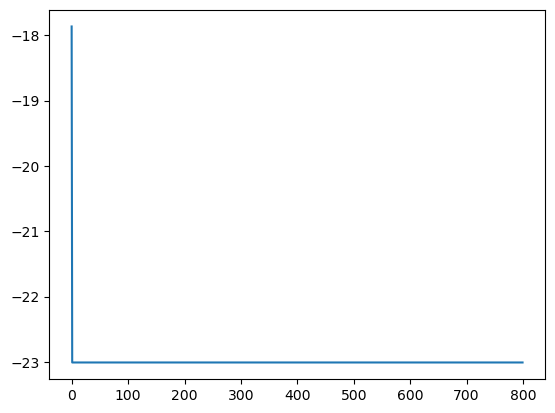

In [5]:
# %% Do PSO粒子群算法
from sko.PSO import PSO

pso = PSO(func=obj_func, n_dim=6,pop=50, max_iter=800, lb=[0,0,0,0,100,2],ub=[3,3,10,20,200,12],  w=0.8, c1=0.5, c2=0.5)
pso.run()
print('best_x is ', pso.gbest_x, 'best_y is', pso.gbest_y)

# %% Plot the result
import matplotlib.pyplot as plt

plt.plot(pso.gbest_y_hist)
plt.show()

In [23]:
#保存结果
pso.gbest_y_hist #历史最优函数值
type(pso.gbest_y_hist)
type( pso.gbest_x)

numpy.ndarray

best_x: [  3.           0.82368059  10.          20.         125.74119813
  10.79493726] best_y -23.008205


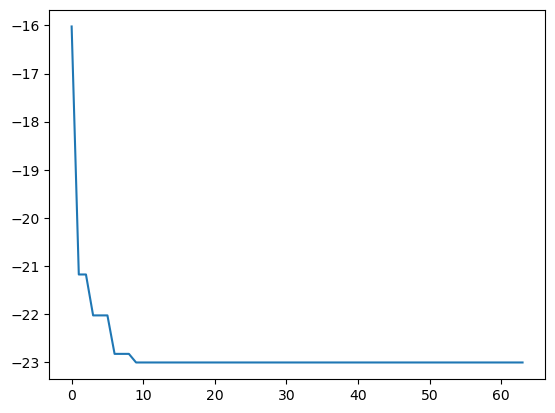

In [8]:
# %% Do SA 模拟退火法以及其他三种模拟退火流派: Fast, Boltzmann, Cauchy.
from sko.SA import SA

sa = SA(func=obj_func, x0=[1,1,6,10,200,12], T_max=10, T_min=1e-9, L=300, max_stay_counter=150, lb=[0,0,0,0,100,2],ub=[3,3,10,20,200,12])
best_x, best_y = sa.run()
print('best_x:', best_x, 'best_y', best_y)

# %% Plot the result
import matplotlib.pyplot as plt
import pandas as pd

plt.plot(pd.DataFrame(sa.best_y_history).cummin(axis=0))
plt.show()

In [17]:
#保存结果
type(sa.best_y_history)

list

In [20]:
a=np.zeros((1,7))
print(a)

[[0. 0. 0. 0. 0. 0. 0.]]


In [21]:
a[:,0:6]=best_x
a[:,-1]=best_y
print(a)

[[  3.           0.82368059  10.          20.         125.74119813
   10.79493726 -23.00820541]]


In [2]:
#将四种优化算法重复进行50次，记录50次的历史优化记录
#并记录50次 最终优化结果

# %% Do DifferentialEvolution差分进化算法
from sko.DE import DE
#遗传算法
from sko.GA import GA 
# %% Do PSO粒子群算法
from sko.PSO import PSO
#https://scikit-opt.github.io/scikit-opt/#/zh/README SKO的中文文档
# %% Do SA 模拟退火法以及其他三种模拟退火流派: Fast, Boltzmann, Cauchy.
from sko.SA import SA

def obj_func(x):
    return -model_test.predict(x.reshape(1,6))[0]

constraint_ueq =[
    lambda x: 0 - x[0] * x[1],
    lambda x: x[0] + x[1] - 3
]
de_history_result=[]
ga_history_result=[]
pso_history_result=[]
sa_history_result=[]

de_best=np.zeros((50,7))
ga_best=np.zeros((50,7))
pso_best=np.zeros((50,7))
sa_best=np.zeros((50,7))

for i in range(50):
    print(i)
    de = DE(func=obj_func, n_dim=6, size_pop=50, max_iter=800, lb=[0,0,0,0,100,2],ub=[3,3,10,20,200,12], constraint_ueq=constraint_ueq)
    best_x, best_y = de.run()
    de_history_result.append(de.generation_best_Y)
    de_best[i:,0:6]=best_x
    de_best[i:,-1]=best_y

    
    ga = GA(func=obj_func, n_dim=6, size_pop=50, max_iter=800, lb = [0,0,0,0,100,2],
        ub=[3,3,10,20,200,12], constraint_ueq=constraint_ueq, precision= [1e-7,1e-7, 1, 1, 10, 1])
    best_x, best_y = ga.run()
    ga_history_result.append(ga.generation_best_Y)
    ga_best[i:,0:6]=best_x
    ga_best[i:,-1]=best_y


    pso = PSO(func=obj_func, n_dim=6,pop=50, max_iter=800, lb=[0,0,0,0,100,2],ub=[3,3,10,20,200,12],  w=0.8, c1=0.5, c2=0.5)
    pso.run()
    pso_history_result.append(pso.gbest_y_hist)
    pso_best[i:,0:6]=pso.gbest_x
    pso_best[i:,-1]= pso.gbest_y


    sa = SA(func=obj_func, x0=[1,1,6,10,200,12], T_max=10, T_min=1e-9, L=300, max_stay_counter=150, lb=[0,0,0,0,100,2],ub=[3,3,10,20,200,12])
    best_x, best_y = sa.run()
    sa_history_result.append(sa.best_y_history)
    sa_best[i:,0:6]=best_x
    sa_best[i:,-1]= best_y

    del de,ga,pso,sa
    del best_x,best_y
    

0


KeyboardInterrupt: 

In [ ]:
#将历史记录保存为xlxs
# 将list转换为DataFrame对象,保存为Excel文件

data1 = pd.DataFrame (de_history_result)
data1.to_excel('./opt_result/de_history_result.xlsx', index=True)

data2 = pd.DataFrame (ga_history_result)
data2.to_excel('./opt_result/ga_history_result.xlsx', index=True)

data3 = pd.DataFrame (pso_history_result)
data3.to_excel('./opt_result/pso_history_result.xlsx', index=True)

data4 = pd.DataFrame (sa_history_result)
data4.to_excel('./opt_result/sa_history_result.xlsx', index=True)

In [ ]:
#将四种最终优化结果保存
data1 = pd.DataFrame(data=de_best,columns=["M1","M2","C","V","T","H","QY"])
data1.to_csv('./opt_result/de_best.csv', header=True)

data2 = pd.DataFrame(data=ga_best,columns=["M1","M2","C","V","T","H","QY"])
data2.to_csv('./opt_result/ga_best.csv', header=True)

data3 = pd.DataFrame(data=pso_best,columns=["M1","M2","C","V","T","H","QY"])
data3.to_csv('./opt_result/pso_best.csv', header=True)

data4 = pd.DataFrame(data=sa_best,columns=["M1","M2","C","V","T","H","QY"])
data4.to_csv('./opt_result/sa_best.csv', header=True)
